In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the iris dataset
iris = datasets.load_iris()

In [3]:
#Select the two featuers
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [6]:
print(X_train[0:5])

[[1.4 0.2]
 [1.7 0.2]
 [5.3 2.3]
 [5.7 2.1]
 [1.2 0.2]]


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
print(X_train_std[0:5])

[[-1.33269725 -1.30728421]
 [-1.16537974 -1.30728421]
 [ 0.84243039  1.44587881]
 [ 1.0655204   1.18367281]
 [-1.44424226 -1.30728421]]


In [11]:
print(X_train.mean())
print(X_train_std.mean())
print(X_train.std())
print(X_train_std.std())

2.4933333333333327
1.0150610510858574e-16
1.891674323458387
0.9999999999999999


In [16]:
#let's use the one-vs.-rest (OvR) method from scikit
from sklearn.linear_model import Perceptron 

ppn = Perceptron(eta0=0.1, random_state=1)
ppnTwo = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [13]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))

Accuracy: 0.97778


In [17]:
ppnTwo.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))

Misclassified examples: 30
Accuracy: 0.33333


In [18]:
from matplotlib.colors import ListedColormap

In [28]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors)#[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1], edgecolor='black',
                    alpha=1.0, linewidth=1, marker='o',
                    s=100, label='test set')

C:\Users\Mo\AppData\Local\Temp\ipykernel_20356\2865925636.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


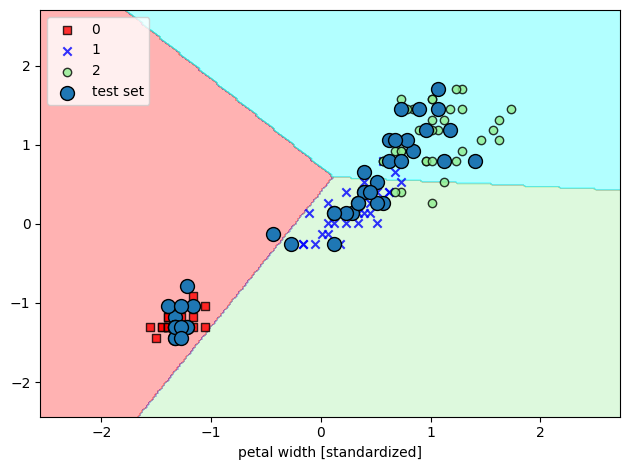

In [29]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150))
plt.xlabel('petal lenght [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Implementation of the logistic regression GD function

In [30]:
class LogisticRegressionGD(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250,250)))
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [32]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

C:\Users\Mo\AppData\Local\Temp\ipykernel_20356\2865925636.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


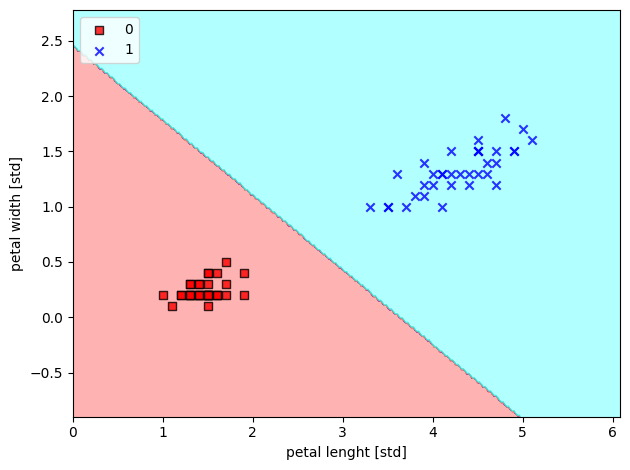

In [34]:
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal lenght [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Let's try traininga logit model using scikit-elarn

In [35]:
from sklearn.linear_model import LogisticRegression

C:\Users\Mo\AppData\Local\Temp\ipykernel_20356\2865925636.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


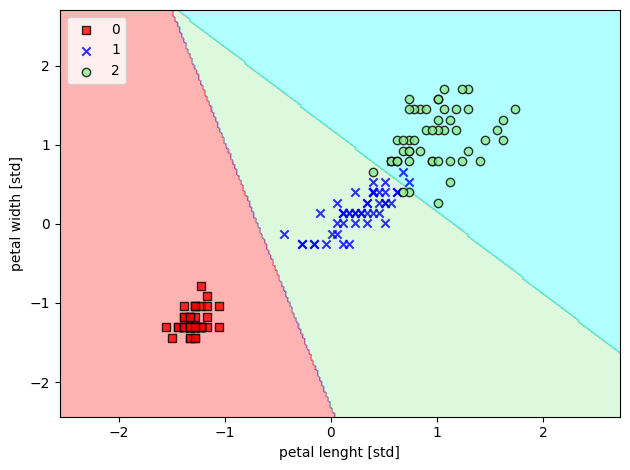

In [37]:
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,105))
plt.xlabel('petal lenght [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Mo\AppData\Local\Temp\ipykernel_20356\2865925636.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


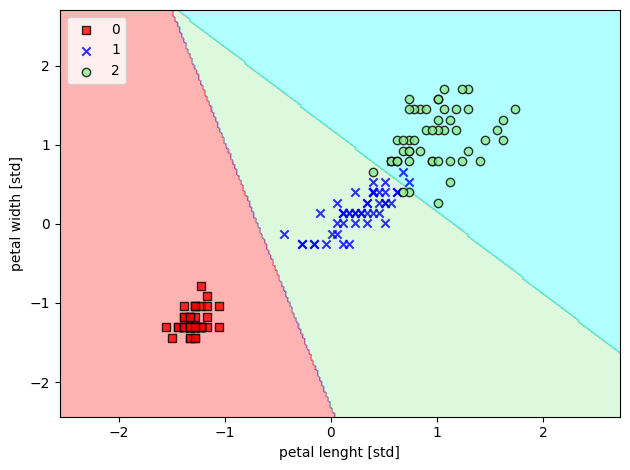

In [38]:
lr1 = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='multinomial')
lr1.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,105))
plt.xlabel('petal lenght [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Mo\AppData\Local\Temp\ipykernel_20356\2865925636.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


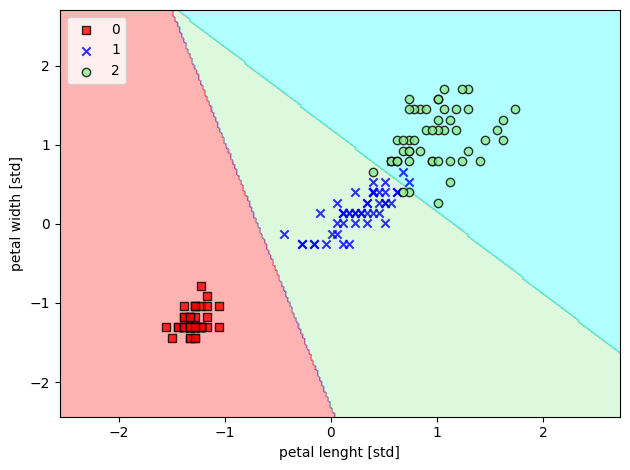

In [39]:
lr1 = LogisticRegression(C=100.0, random_state=1, solver='newton-cg', multi_class='ovr')
lr1.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,105))
plt.xlabel('petal lenght [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mo\AppData\Local\Temp\ipykernel_20356\2865925636.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


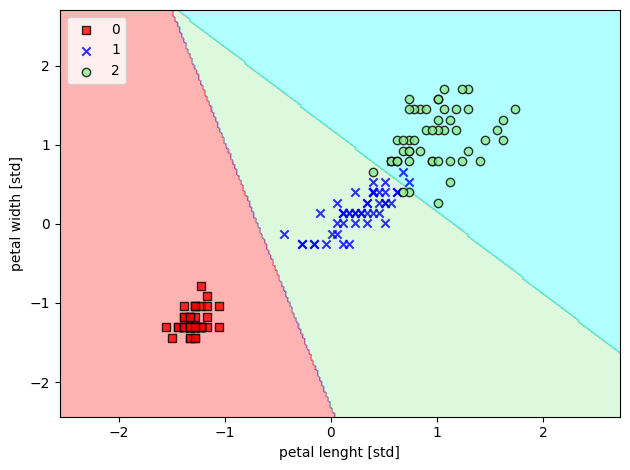

In [40]:
lr1 = LogisticRegression(C=100.0, random_state=1, solver='sag', multi_class='ovr')
lr1.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,105))
plt.xlabel('petal lenght [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mo\AppData\Local\Temp\ipykernel_20356\2865925636.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


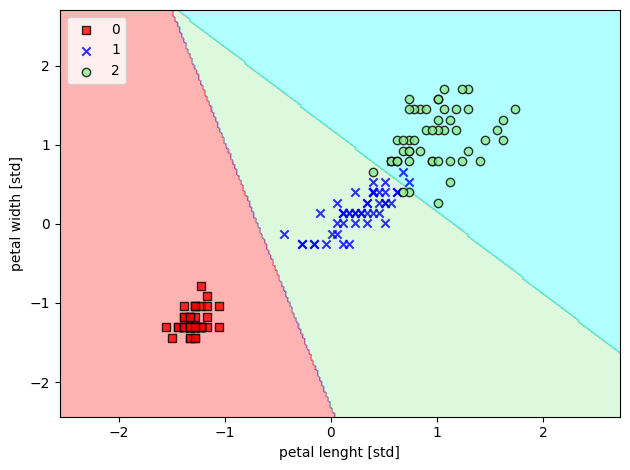

In [41]:
lr1 = LogisticRegression(C=100.0, random_state=1, solver='saga', multi_class='ovr')
lr1.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,105))
plt.xlabel('petal lenght [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Mo\AppData\Local\Temp\ipykernel_20356\2865925636.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


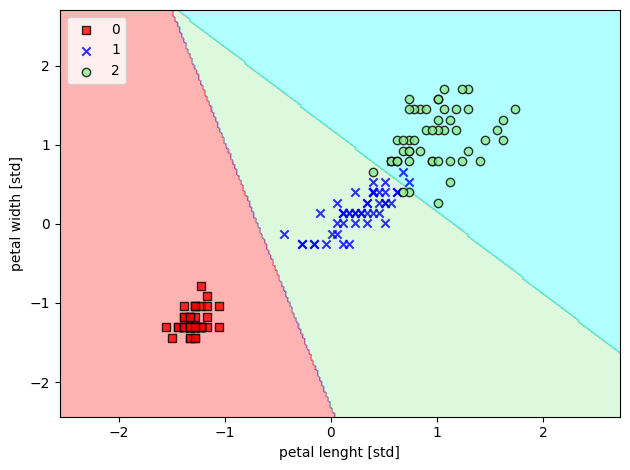

In [42]:
lr1 = LogisticRegression(C=100.0, random_state=1, solver='liblinear', multi_class='ovr')
lr1.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,105))
plt.xlabel('petal lenght [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [46]:
# Let's predict the probablites of the first 3 examples belonging to a class
lr.predict_proba(X_test_std[:3,:])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [47]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0], dtype=int64)